.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

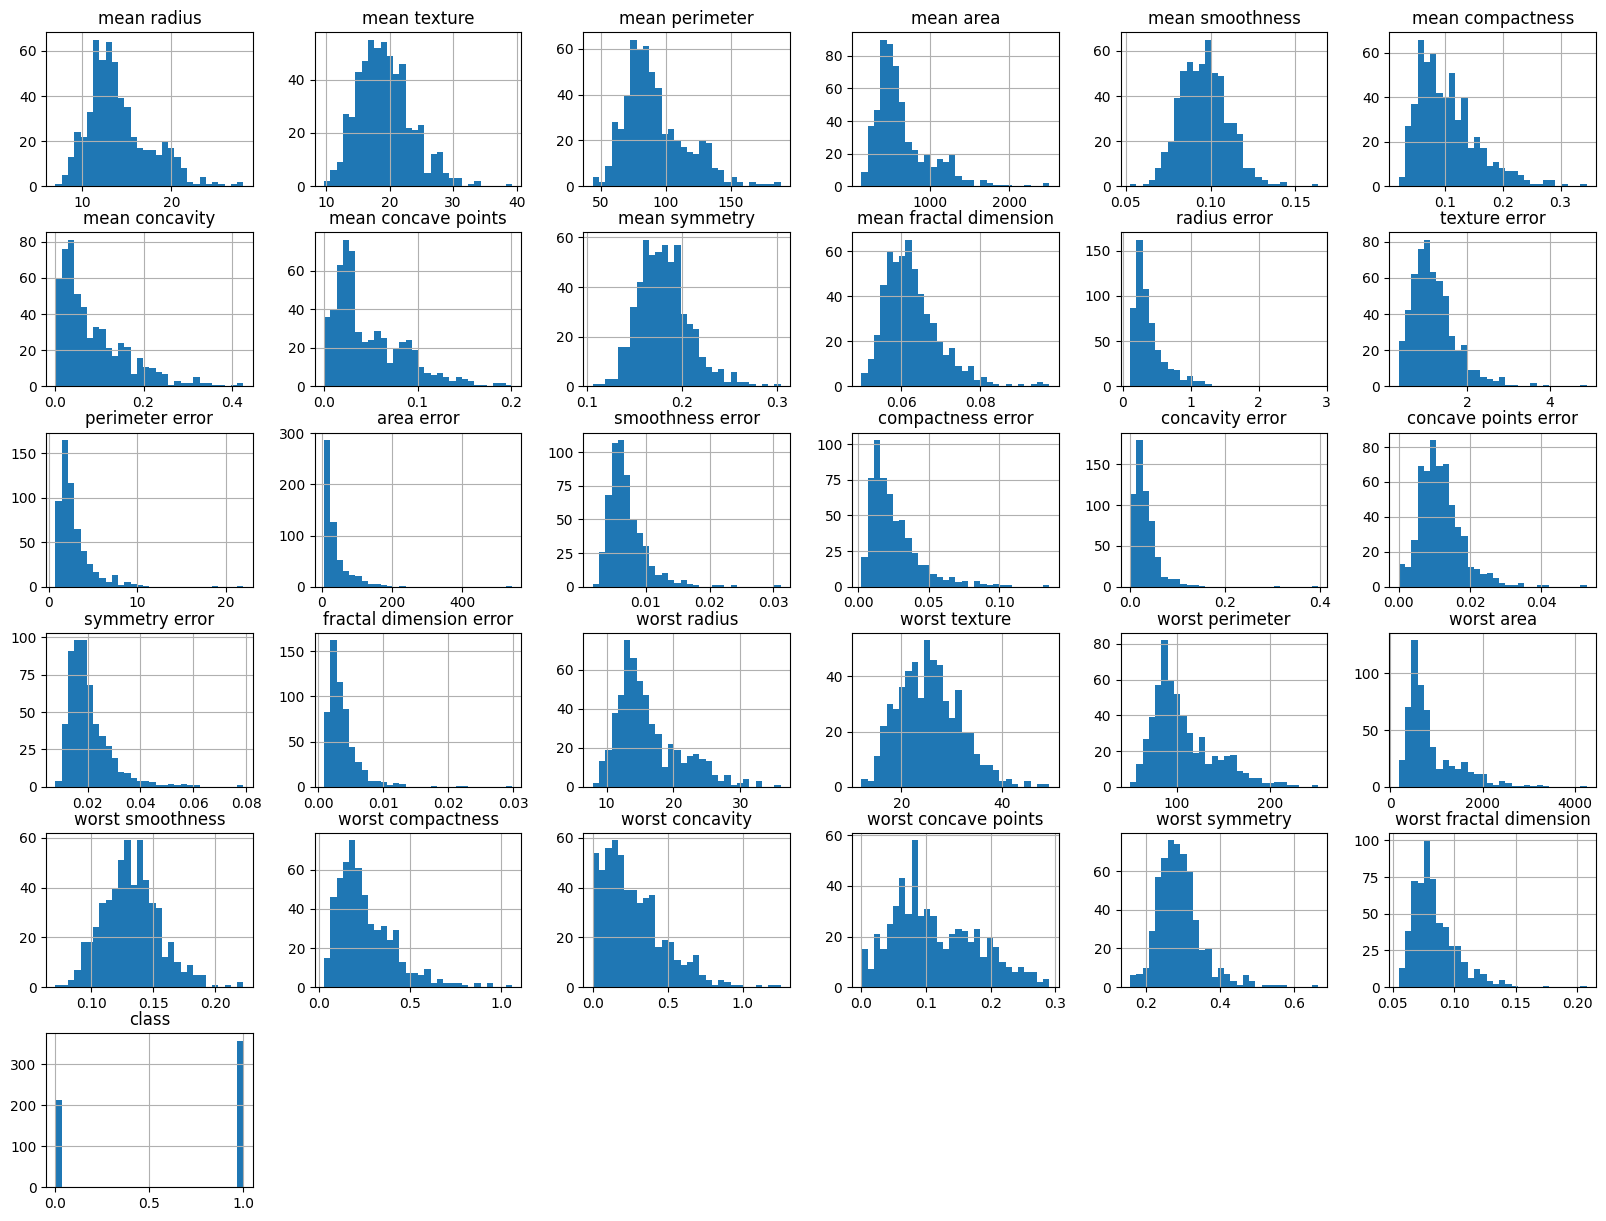

In [21]:
"""
#分類とは、カテゴリーを予測する分析手法
#分類では回帰と同様に、教師あり学習によって予測モデルを構築します。つまり、分類には、説明変数と目的変数がセットになっているデータが必要
1. 課題把握とゴールの設定
・乳房のしこりの検査データから、悪性であるか良性であるかを判断したい。
・特に、悪性の判断を見落とさないようにしたい。
・予測結果を診断の参考情報とするため、どのようなロジックで予測が行われたかを明確にしてほしい
分析のゴールは；
・しこりの検査データから、悪性か良性かを判定する分類の予測モデルを構築する。悪性の見落としの少ない予測モデルが望ましい。
・悪性か良性かの判定根拠を可視化する。
"""
#2. 必要なライブラリのインポート
import pandas as pd
#3. データの取得
#scikit-learnが提供しているサンプルデータ「Breast cancer wisconsin dataset」を利用する。
from sklearn.datasets import load_breast_cancer
#インポートしたload_breast_cancer関数を実行し、datasetという変数に代入して連想配列のデータを取得する。
dataset = load_breast_cancer()
dataset
#4.データの概要確認と前処理
#活用するデータの概要を確認する。データの概要は、datasetのDESCRキーに格納されている。
print(dataset.DESCR)
#データの内容の確認
#データの値を確認しましょう。datasetのdataキーにしこりの検査データが、feature_namesキーに各要素の名称が格納されている。
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()
#悪性/良性を示すデータを「class」という列名でDataFrameに追加
df['class'] = dataset.target
df.head()
#一番右側に、悪性/良性を示すデータを追加できました。0が悪性、1が良性を示しています。次に、データのサイズを確認
#確認結果は569行31列であり、データ数569、30種類の検査データ、悪性/良性のフラグというデータ構成と一致
df.shape
#データの欠損の確認、次は、データの欠損の有無を確認
#全列ともにNon-null Countが569のため、データの欠損がないことを確認
df.info()
#外れ値の確認
#次は、ヒストグラムで各要素の分布を可視化して、外れ値の有無を確認する。
#figsizeは(20, 15)に設定します。ヒストグラムのバーの数は、今回は30に設定
df.hist(figsize=(20, 15), bins=30)

#5. 学習データとテストデータへの分割
#取り込んだデータを学習データとテストデータに分割します。まずは、説明変数Xと目的変数yに分割する。
X = df.drop(columns=['class']).to_numpy()
y = df['class'].to_numpy()
#Xとyをそれぞれ、学習データとテストデータに分割します。train_test_split関数をインポートし、比率7:3で学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#問題なく7:3に分割されたか、データ数を確認
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#6. 予測モデルの学習
#次は、決定木の予測モデルに対して学習を行います。scikit-learnで提供されている決定木の予測モデルのクラスは、
#treeモジュールのDecisionTreeClassifierです。DecisionTreeClassifierクラスをインスタンス化して、modelという変数に代入
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
#学習データで学習させる。
model.fit(X_train, y_train)

#7. 予測モデルの評価
#次は、予測モデルを評価しましょう。分類の予測モデルには、正解率・適合率・再現率といった複数の評価指標があります。
#scikit-learnには、これらの指標を一挙に出力できるclassification_reportという関数
y_pred = model.predict(X_test)
y_pred
#目的変数のテストデータを確認
y_test
#classification_reportで評価指標を出力してみましょう。metricsモジュールのclassification_report関数をインポートし、
#第1引数にy_testを、第2引数にy_predを指定
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#8. 予測
#「data_breastcancer.csv」から取得してください。その後、Google Colaboratoryに「data_breastcancer.csv」をアップロード
#アップロードしたファイルを読み込み
df_X_new = pd.read_csv('sample_data/data_breastcancer.csv')
df_X_new.head()
#取り込んだデータをもとに悪性であるか良性であるかを予測
X_new = df_X_new.to_numpy()
model.predict(X_new)
#悪性/良性の判定根拠の可視化
#悪性/良性の判定根拠として、決定木の条件分岐構造を参考にできます。treeモジュールのexport_text関数によって、決定木の条件分岐の可視化が可能
from sklearn.tree import export_text
# 要素名の取得
names = dataset.feature_names
# 要素名をリスト形式に変換
names_list = names.tolist()
# 条件分岐構造を出力
print(export_text(model, decimals=3, feature_names=names_list))

#12.4 予測モデルの改善
#現状の予測精度は、正解率が約91%、悪性の再現率が約94%です。この精度をさらに高めていきましょう。
model = DecisionTreeClassifier(
    max_depth=2,
    max_leaf_nodes=3,
    min_samples_leaf=10,
    random_state=0)
model.fit(X_train, y_train)
#予測モデルの評価を行います。classification_reportで評価するために、まずは、予測モデルで説明変数Xのテストデータから悪性/良性の予測値を出力
y_pred = model.predict(X_test)
y_pred
#classification_reportで評価指標を出力
print(classification_report(y_test, y_pred))

#予測
#予測モデルを活用して、先程ファイルから取り込んだしこりの検査データから悪性/良性を予測
model.predict(X_new)

#悪性/良性の判定根拠の可視化
#改善した予測モデルも、悪性/良性の判定根拠として条件分岐の構造を活用
print(export_text(model, decimals=3, feature_names=names_list))

